In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("Sephora_product_review/cleaned_product_reviews.csv")

C:\Users\veera\AppData\Local\Temp\ipykernel_61064\2804774923.py:1: DtypeWarning: Columns (1,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Sephora_product_review/cleaned_product_reviews.csv")


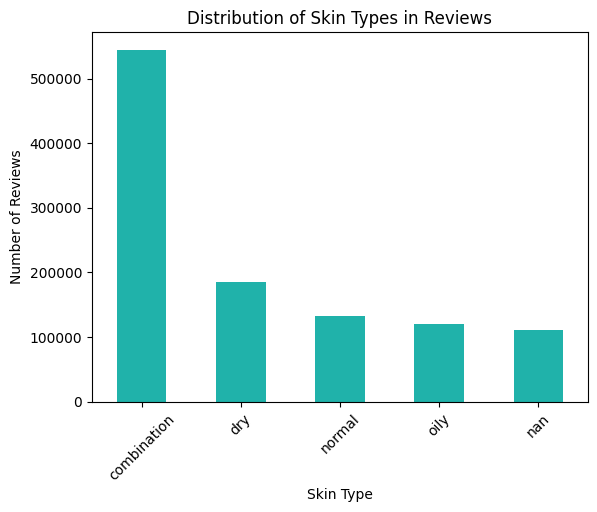

In [4]:
import matplotlib.pyplot as plt

df['skin_type'].value_counts(dropna=False).plot(kind='bar', color='lightseagreen')
plt.title("Distribution of Skin Types in Reviews")
plt.xlabel("Skin Type")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

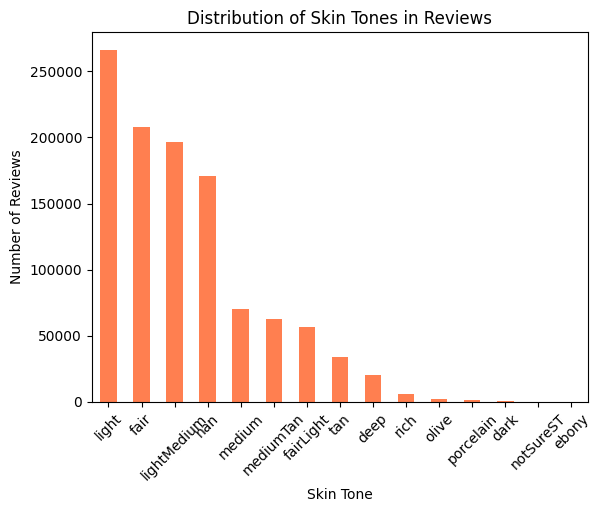

In [5]:
df['skin_tone'].value_counts(dropna=False).plot(kind='bar', color='coral')
plt.title("Distribution of Skin Tones in Reviews")
plt.xlabel("Skin Tone")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

In [9]:
df['skin_tone'].value_counts(dropna=False)

skin_tone
light          266418
fair           208034
lightMedium    196541
NaN            170539
medium          70486
mediumTan       62456
fairLight       56228
tan             33678
deep            20601
rich             5493
olive            1730
porcelain        1612
dark              522
notSureST          70
ebony               3
Name: count, dtype: int64

In [10]:
def clean_skin_tone(tone):
    if pd.isna(tone):
        return "unknown"
    
    tone = tone.lower()
    if any(x in tone for x in ["fair", "light"]) and "medium" not in tone:
        return "light"
    elif "lightmedium" in tone or "fairmedium" in tone or "light.medium" in tone:
        return "light-medium"
    elif "medium" in tone and "tan" not in tone:
        return "medium"
    elif "tan" in tone:
        return "tan"
    elif tone in ["deep", "dark", "rich", "olive", "ebony"]:
        return "deep"
    else:
        return "other"

df['skin_tone_clean'] = df['skin_tone'].apply(clean_skin_tone)
df['skin_tone_clean'].value_counts()


skin_tone_clean
light           530680
light-medium    196541
unknown         170539
tan              96134
medium           70486
deep             28349
other             1682
Name: count, dtype: int64

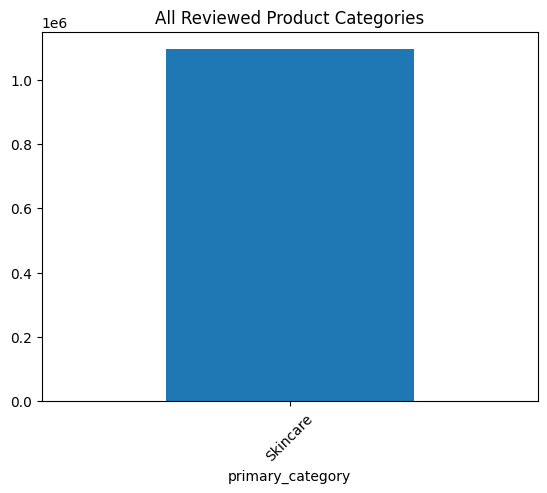

In [8]:
df['primary_category'].value_counts().plot(kind='bar')
plt.title("All Reviewed Product Categories")
plt.xticks(rotation=45)
plt.show()

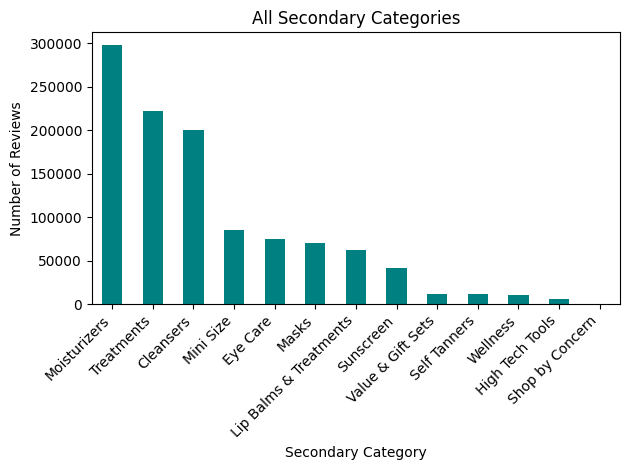

In [15]:
df['secondary_category'].value_counts().plot(kind='bar', color='teal')
plt.title("All Secondary Categories")
plt.xlabel("Secondary Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


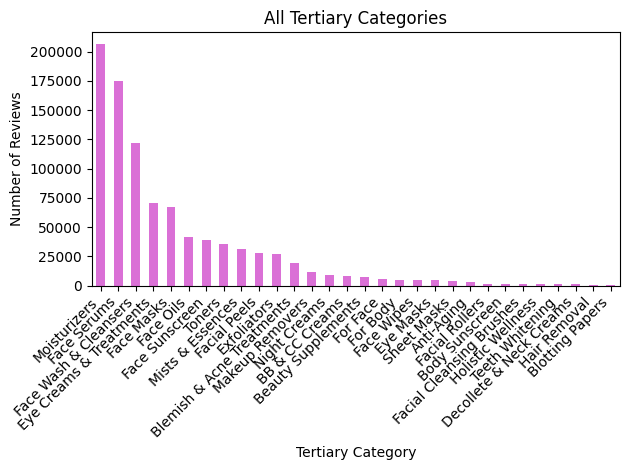

In [13]:
df['tertiary_category'].value_counts().plot(kind='bar', color='orchid')
plt.title("All Tertiary Categories")
plt.xlabel("Tertiary Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()